# import Libraries

In [9]:
import os
import shutil
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
plt.style.use("ggplot")
import time

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F

from tqdm import tqdm

## Reading the Data

In [10]:
# read the unzipped data
path, dirs, files = next(os.walk('train'))

file_counts = len(files)
print(f"Files count: {file_counts}")

Files count: 25000


In [11]:
# set the base dir
base_dir = "C:/Users/Idrees/Desktop/AI Projects/Machine-Learning-Deep-Lernin-Projects/Dogs_vs_cats_classifier"
os.mkdir(base_dir)

In [12]:
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [13]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') #Directory with 
os.mkdir(validation_cats_dir) #validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') #Directory with 
os.mkdir(validation_dogs_dir) #validation dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')
#Directory with test cat pictures
os.mkdir(test_cats_dir)

In [14]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [15]:
fname = ['cat.{}.jpg'.format(i) for i in range(10)] # for understanding

In [16]:
fname

['cat.0.jpg',
 'cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg',
 'cat.9.jpg']

In [17]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [18]:
original_dataset_dir = 'C:/Users/Idrees/Desktop/AI Projects/Machine-Learning-Deep-Lernin-Projects/train'

In [19]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst)
 #copy images from one to another

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    #Copies the next 500 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    #Copies the next 500 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [22]:
# make an train dir
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validate_dir = os.path.join(base_dir, 'val')

# create the directory
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validate_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/Idrees/Desktop/AI Projects/Machine-Learning-Deep-Lernin-Projects/Dogs_vs_cats_classifier\\train'

In [10]:
# create an training folders
train_dog_dir = os.path.join(train_dir, 'dogs')
train_cat_dir = os.path.join(train_dir, 'cats')

# create an testing folders
test_dog_dir = os.path.join(test_dir, "dogs")
test_cat_dir = os.path.join(test_dir, "cats")

# create an validation folders
val_dog_dir = os.path.join(validate_dir, "dogs")
val_cat_dir = os.path.join(validate_dir, "cats")

# make training folders
os.mkdir(train_dog_dir)
os.mkdir(train_cat_dir)

os.mkdir(test_dog_dir)
os.mkdir(test_cat_dir)

os.mkdir(val_dog_dir)
os.mkdir(val_cat_dir)

In [55]:
# get the training data
dir_path = 'train'
train_dir = os.listdir('dir_path')
print(f"Length of the train directory: {len(train_dir)}")

cat_count = 0
dog_count = 0

for i in os.listdir(dir_path):
    if i.startswith('cat.'):
        cat_count += 1
    elif i.startswith('dog.'):
        dog_count += 1
        
        
print(f"Number of dog images: {dog_count}")
print(f"Number of cat images: {cat_count}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dir_path'

In [13]:
original_dataset = 'train'

fnames = [f'cat.{i}.jpg' for i in range(10001)]

for fname in fnames:
    src = os.path.join(original_dataset, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames_cat_val = [f'cat.{i}.jpg' for i in range(10001, 11251)]

for fname in fnames_cat_val:
    src = os.path.join(original_dataset, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames_cat_test = [f'cat.{i}.jpg' for i in range(11251, 12500)]

for fname in fnames_cat_test:
    src = os.path.join(original_dataset, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames_dog_train = [f'dog.{i}.jpg' for i in range(10001)]

for fname in fnames_dog_train:
    src = os.path.join(original_dataset, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)
    
fnames_dog_val = [f'dog.{i}.jpg' for i in range(10001, 11251)]

for fname in fnames_dog_val:
    src = os.path.join(original_dataset, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(src, dst)
    
fnames_dog_test = [f'dog.{i}.jpg' for i in range(11251, 12500)]

for fname in fnames_dog_test:
    src = os.path.join(original_dataset, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)

In [43]:
print(f'Total training cat images {len(os.listdir(train_cat_dir))}')
print(f'Total validation cat images {len(os.listdir(val_cat_dir))}')
print(f'Total test cat images {len(os.listdir(test_cat_dir))}')
print('\n')
print(f'Total training dog images {len(os.listdir(train_dog_dir))}')
print(f'Total validation cat images {len(os.listdir(val_dog_dir))}')
print(f'Total test cat images {len(os.listdir(test_dog_dir))}')

Total training cat images 10001
Total validation cat images 1250
Total test cat images 1249


Total training dog images 10001
Total validation cat images 1250
Total test cat images 1249


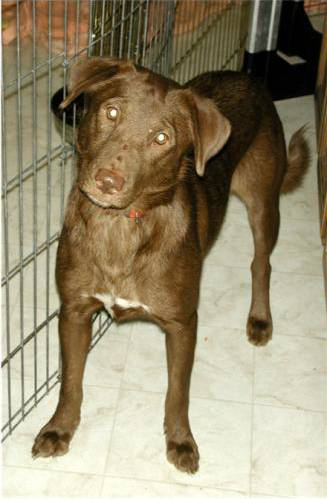

In [26]:
# simply reading the random image
# set the random seed
random.seed(42)

# get the all image paths
image_path = "C:/Users/Idrees/Desktop/AI Projects/Machine-Learning-Deep-Lernin-Projects/Dogs_vs_cats_classifier/train/dogs/dog.1.jpg"

img = Image.open(image_path)

img

In [27]:
# some basic information
print(f"Shape of the image: {img.size}")

Shape of the image: (327, 499)


## Build Your network

In [28]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Dense Classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## Configuring the model for training

In [30]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape) 
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [34]:
history = model.fit(train_generator,steps_per_epoch=100,
                              epochs=30,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 835ms/step - acc: 0.4995 - loss: 0.6931 - val_acc: 0.5080 - val_loss: 0.6802
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 620ms/step - acc: 0.5391 - loss: 0.6812 - val_acc: 0.5960 - val_loss: 0.6575
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 621ms/step - acc: 0.6101 - loss: 0.6546 - val_acc: 0.6230 - val_loss: 0.6352
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 648ms/step - acc: 0.6265 - loss: 0.6353 - val_acc: 0.6790 - val_loss: 0.6072
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 637ms/step - acc: 0.6666 - loss: 0.5918 - val_acc: 0.6830 - val_loss: 0.5999
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_

In [34]:
model.save('cats_and_dogs_small_2.h5')

In [35]:
model.save('my_model.keras')

In [35]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.2,
                             horizontal_flip=True,fill_mode='nearest')

In [3]:
import os

In [4]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

NameError: name 'train_cats_dir' is not defined

## Defining a new convnet that includes dropout

In [1]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

NameError: name 'models' is not defined

## Training the convnet using data-augmentation generators

In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [18]:
# transforms for the image
data_transform = transforms.Compose([
    # resize the image into 256x256
    transforms.Resize(size=(224, 224)),
    # flip the images randomly on horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # turn the image into a torch tensor
    transforms.ToTensor()
])

In [19]:
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)

In [20]:
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=100,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=100,
    shuffle=False
)

In [21]:
len(train_dataloader)

201

## CNN Model Building

In [22]:
# Pytorch Convolutional Neural Network Model Architecture
class CatAndDogConvNet(nn.Module):

    def __init__(self):
        super().__init__()

        # onvolutional layers (3,16,32)
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size=(5, 5), stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size=(5, 5), stride=2, padding=1)
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size=(3, 3), padding=1)

        # conected layers
        self.fc1 = nn.Linear(in_features= 64 * 6 * 6, out_features=500)
        self.fc2 = nn.Linear(in_features=500, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=2)


    def forward(self, X):

        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2)

        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2)

        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2)

        X = X.view(X.shape[0], -1)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return X

In [23]:
# Create instance of the model
model = CatAndDogConvNet()

losses = []
accuracies = []
epoches = 8
start = time.time()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Model Training...
for epoch in range(epoches):

    epoch_loss = 0
    epoch_accuracy = 0

    for X, y in tqdm(train_dataloader):

        preds = model(X)
        loss = loss_fn(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        accuracy = ((preds.argmax(dim=1) == y).float().mean())
        epoch_accuracy += accuracy
        epoch_loss += loss

    epoch_accuracy = epoch_accuracy/len(train_dataloader)
    accuracies.append(epoch_accuracy)
    epoch_loss = epoch_loss / len(train_dataloader)
    losses.append(epoch_loss)

    print("\nEpoch: {}, train loss: {:.4f}, train acc: {:.4f}".format(epoch, epoch_loss, epoch_accuracy))

    # test set accuracy
    with torch.no_grad():

        test_epoch_loss = 0
        test_epoch_accuracy = 0

        for test_X, test_y in test_dataloader:

            test_preds = model(test_X)
            test_loss = loss_fn(test_preds, test_y)

            test_epoch_loss += test_loss            
            test_accuracy = ((test_preds.argmax(dim=1) == test_y).float().mean())
            test_epoch_accuracy += test_accuracy

        test_epoch_accuracy = test_epoch_accuracy/len(test_dataloader)
        test_epoch_loss = test_epoch_loss / len(test_dataloader)

        print("Epoch: {}, test loss: {:.4f}, test acc: {:.4f}".format(epoch, test_epoch_loss, test_epoch_accuracy))

100%|██████████| 201/201 [06:27<00:00,  1.93s/it]



Epoch: 0, train loss: 0.6616, train acc: 0.5896
Epoch: 0, test loss: 0.6587, test acc: 0.6122


100%|██████████| 201/201 [03:51<00:00,  1.15s/it]



Epoch: 1, train loss: 0.5962, train acc: 0.6809
Epoch: 1, test loss: 0.5722, test acc: 0.6998


100%|██████████| 201/201 [04:02<00:00,  1.20s/it]



Epoch: 2, train loss: 0.5351, train acc: 0.7308
Epoch: 2, test loss: 0.5176, test acc: 0.7519


100%|██████████| 201/201 [04:59<00:00,  1.49s/it]



Epoch: 3, train loss: 0.4748, train acc: 0.7768
Epoch: 3, test loss: 0.5348, test acc: 0.7209


100%|██████████| 201/201 [04:55<00:00,  1.47s/it]



Epoch: 4, train loss: 0.4366, train acc: 0.7976
Epoch: 4, test loss: 0.4672, test acc: 0.7833


100%|██████████| 201/201 [04:51<00:00,  1.45s/it]



Epoch: 5, train loss: 0.4145, train acc: 0.8113
Epoch: 5, test loss: 0.4859, test acc: 0.7758


100%|██████████| 201/201 [04:48<00:00,  1.44s/it]



Epoch: 6, train loss: 0.4010, train acc: 0.8177
Epoch: 6, test loss: 0.5044, test acc: 0.7637


100%|██████████| 201/201 [04:53<00:00,  1.46s/it]



Epoch: 7, train loss: 0.3721, train acc: 0.8323
Epoch: 7, test loss: 0.3713, test acc: 0.8311


In [25]:
model

CatAndDogConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2304, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [26]:
epoch

7

In [27]:
test_epoch_loss

tensor(0.3713)

In [28]:
test_epoch_accuracy

tensor(0.8311)

In [29]:
epoch_loss

tensor(0.3721, grad_fn=<DivBackward0>)

In [31]:
epoch_accuracy

tensor(0.8323)

In [ ]:
   print("\nEpoch: {}, train loss: {:.4f}, train acc: {:.4f}".format(epoch, epoch_loss, epoch_accuracy))

In [ ]:
        print("Epoch: {}, test loss: {:.4f}, test acc: {:.4f}".format(epoch, test_epoch_loss, test_epoch_accuracy))

In [34]:
epoch

7